In [1]:
import os
import openai
import speech_recognition as sr
import wave
import requests
from io import BytesIO
from PIL import Image
from dotenv import load_dotenv
from IPython.display import display, Audio, Image as IPImage

In [2]:
# Load OpenAI API Key
load_dotenv()
openai.api_key = os.getenv("OPENAI_API_KEY")  # Replace with your actual key

In [3]:
# Function to Record Real-Time Audio
def record_audio(filename="recorded_audio.wav", duration=15, sample_rate=44100):
    recognizer = sr.Recognizer()
    microphone = sr.Microphone()

    with microphone as source:
        print("🎙 Speak now...")
        recognizer.adjust_for_ambient_noise(source)
        audio = recognizer.listen(source, timeout=duration)

    with open(filename, "wb") as f:
        f.write(audio.get_wav_data())
    
    return filename

In [4]:
# Function to Transcribe Audio Using OpenAI Whisper
def transcribe_audio(audio_file):
    with open(audio_file, "rb") as audio:
        response = openai.Audio.transcribe(model="whisper-1", file=audio)
    return response["text"]

In [5]:
# Function to Generate AI Image Using DALL-E 3
def generate_image(prompt):
    response = openai.Image.create(
        model="dall-e-3",
        prompt=prompt,
        n=1,
        size="1024x1024"
    )
    image_url = response["data"][0]["url"]
    image_response = requests.get(image_url)
    img = Image.open(BytesIO(image_response.content))
    return img

In [10]:
# Record Audio
audio_path = record_audio(duration=15)
print("✅ Recording Completed")

🎙 Speak now...
✅ Recording Completed


In [11]:
# Transcribe Audio
transcription = transcribe_audio(audio_path)
print(f"📝 **Transcription:** {transcription}")

📝 **Transcription:** Include a female playing with the solar system.


In [12]:
# Generate AI-modified Image
modified_image = generate_image(transcription)

📸 Original Image:


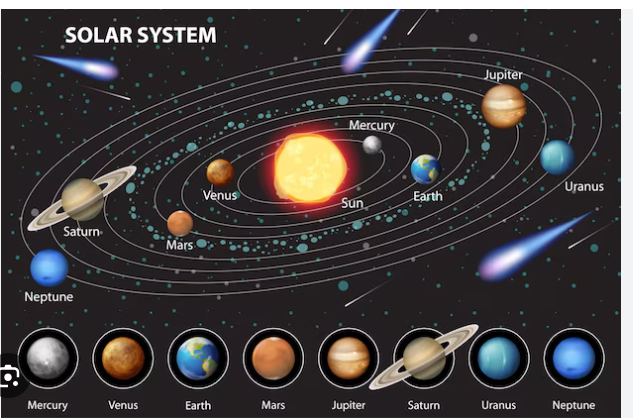

🎨 AI-Generated Image:


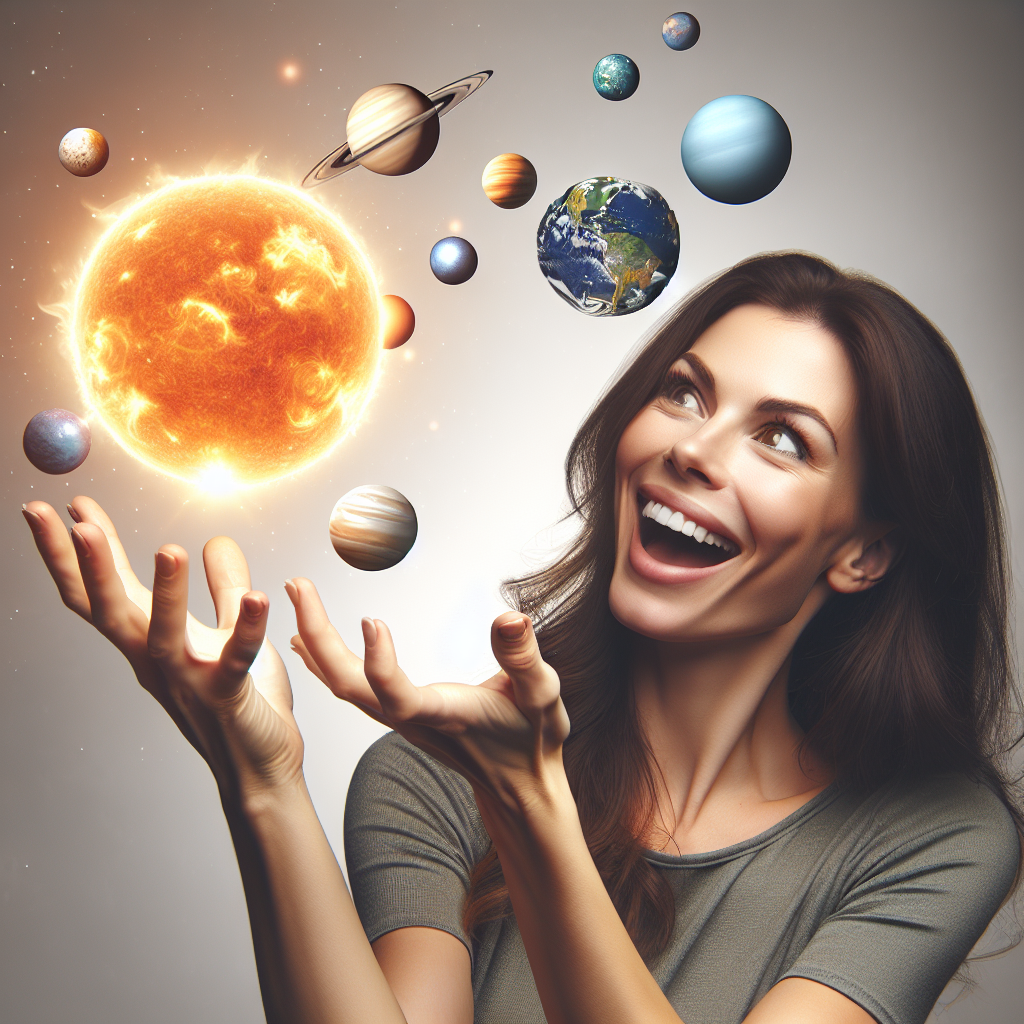

In [21]:
from IPython.display import display, Image as IPImage

# Display Original and Modified Images
uploaded_image = Image.open(r"C:\Users\bharw\Pictures\Screenshots\Screenshot 2025-02-03 181302.png")  # Use raw string
print("📸 Original Image:")
display(IPImage(filename=r"C:\Users\bharw\Pictures\Screenshots\Screenshot 2025-02-03 181302.png", width=400))  # Use raw string
print("🎨 AI-Generated Image:")
display(modified_image)

In [22]:
# Provide Download Option
modified_image.save("modified_image.png")
print("📥 AI-Generated Image saved as 'modified_image.png'.")

📥 AI-Generated Image saved as 'modified_image.png'.


In [23]:
# Embed Audio
display(Audio(filename=audio_path))